# <span style ='color:#0A1172'>DHHS Chronic Disease Indicators: Cancer Prevalance Analysis
## <span style ='color:#59788E'> <bu>EXPLORATORY NOTEBOOK</bu>

- <span style ='color:#016064'>by Annie Carter
- <span style ='color:#016064'>Sourced by U.S. Department of Health & Human Services

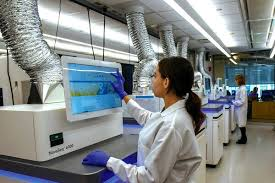

 Custom Palette = Navy #0A1172, Stone #59788E, Ocean #757C88, Berry #241571

In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os
import datetime


## <span style ='color:#241571'>ACQUIRE

In [2]:
# Save and read dataset csv from https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi
df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')

/var/folders/0f/gkm6knzn3fscjt7dxlgc9k5h0000gn/T/ipykernel_21728/2347781156.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI_.csv')


In [3]:
# Review shape to determine processing needs, will use sample size due to network restrictions for exploration
df.shape

(1185676, 34)

In [4]:
#Review data to look at columns datatypes and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [5]:
# Quick review of data in columns started with 40 then transpose for readiability with head of 5
df.head().T

,0,1,2,3,4
YearStart,2014,2018,2018,2017,2010
YearEnd,2014,2018,2018,2017,2010
LocationAbbr,AR,CO,DC,GA,MI
LocationDesc,Arkansas,Colorado,District of Columbia,Georgia,Michigan
DataSource,SEDD; SID,SEDD; SID,SEDD; SID,SEDD; SID,SEDD; SID
Topic,Asthma,Asthma,Asthma,Asthma,Asthma
Question,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma,Hospitalizations for asthma
Response,NaN,NaN,NaN,NaN,NaN
DataValueUnit,NaN,NaN,NaN,NaN,NaN
DataValueType,Number,Number,Number,Number,Number


In [6]:
#created sample DF with random state of 42
df_sample= df.sample(n=100000, random_state=42)


In [7]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 392116 to 656836
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  100000 non-null  int64  
 1   YearEnd                    100000 non-null  int64  
 2   LocationAbbr               100000 non-null  object 
 3   LocationDesc               100000 non-null  object 
 4   DataSource                 100000 non-null  object 
 5   Topic                      100000 non-null  object 
 6   Question                   100000 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              86978 non-null   object 
 9   DataValueType              100000 non-null  object 
 10  DataValue                  67975 non-null   object 
 11  DataValueAlt               67773 non-null   float64
 12  DataValueFootnoteSymbol    33246 non-null   object 
 13  DatavalueFootnote       

In [8]:
# List of columns to remove. 
columns_to_remove = ['YearEnd', 'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
                     'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2',
                     'StratificationCategoryID3', 'StratificationID3','DataValueTypeID','QuestionID', 'TopicID','LocationID','HighConfidenceLimit','LowConfidenceLimit','YearEnd','LocationDesc','DataValueUnit','DataValueType','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategoryID1','StratificationID1','Question','DataSource']

# Drop the specified columns from the DataFrame
df_sample = df_sample.drop(columns_to_remove, axis=1)

In [9]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 392116 to 656836
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   YearStart                100000 non-null  int64 
 1   LocationAbbr             100000 non-null  object
 2   Topic                    100000 non-null  object
 3   DataValue                67975 non-null   object
 4   StratificationCategory1  100000 non-null  object
 5   Stratification1          100000 non-null  object
 6   GeoLocation              99171 non-null   object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


In [10]:
df_sample.Stratification1.value_counts()

Overall                             13932
Hispanic                            12680
Black, non-Hispanic                 12477
White, non-Hispanic                 12407
Male                                11850
Female                              11785
Multiracial, non-Hispanic            7230
Other, non-Hispanic                  7100
American Indian or Alaska Native     5260
Asian or Pacific Islander            5016
Asian, non-Hispanic                   263
Name: Stratification1, dtype: int64

In [13]:
#Sample size has a equal distribution by US State and terroritory will remove "US" data values of 829
df_sample.LocationAbbr.value_counts()

AZ    1969
NC    1968
WV    1948
WI    1932
SD    1930
OK    1924
ND    1921
AR    1920
MT    1907
PA    1905
RI    1904
VT    1901
AK    1898
IA    1898
FL    1894
WA    1893
UT    1893
NJ    1891
OR    1891
NM    1885
OH    1883
CO    1882
NV    1881
TN    1878
NY    1874
MN    1871
IN    1870
SC    1870
MI    1870
AL    1868
ID    1862
KS    1861
DC    1861
IL    1858
TX    1858
MA    1857
WY    1853
MO    1853
MS    1851
NH    1849
GA    1849
ME    1848
HI    1843
VA    1836
NE    1833
CA    1828
KY    1822
LA    1822
CT    1815
DE    1786
MD    1761
VI    1192
GU    1186
PR    1168
US     829
Name: LocationAbbr, dtype: int64

In [14]:
df_sample.Topic.value_counts()

Cancer                                             14733
Cardiovascular Disease                             13393
Diabetes                                           13228
Chronic Obstructive Pulmonary Disease              12868
Asthma                                              6836
Arthritis                                           6560
Nutrition, Physical Activity, and Weight Status     6332
Overarching Conditions                              6199
Alcohol                                             5574
Tobacco                                             5044
Chronic Kidney Disease                              2221
Older Adults                                        2158
Oral Health                                         1854
Mental Health                                       1093
Immunization                                         789
Reproductive Health                                  771
Disability                                           347
Name: Topic, dtype: int64

In [16]:
# List of values to remove from the 'Topic' column
values_to_remove = ['Asthma', 'Arthritis', 'Nutrition, Physical Activity, and Weight Status', 'Overarching Conditions','Alcohol','Tobacco','Chronic Kidney Disease','Older Adults','Oral Health','Mental Health','Immunization','Reproductive Health','Disability']

# Drop rows with specific values from the 'Topic' column
df_sample = df_sample.drop(df_sample[df_sample['Topic'].isin(values_to_remove)].index)

df_sample.Topic.value_counts()


Cancer                                   14733
Cardiovascular Disease                   13393
Diabetes                                 13228
Chronic Obstructive Pulmonary Disease    12868
Name: Topic, dtype: int64

In [17]:
# Will use Cancer to create one-hot code "dummy" value for prevalaence \n"Yes_cancer" and Cardiovascular Disease, Diabetes & COPD \n . I will remove other Topics reduce date to  
# Create a dummy variable for the 'Topic' column
df_sample['Yes_cancer'] = np.where(df_sample['Topic'] == 'Cancer', 1, 0).astype(int)

# Drop the original 'Topic' column
df_sample.drop('Topic', axis=1, inplace=True)

df_sample.head()

,YearStart,LocationAbbr,DataValue,StratificationCategory1,Stratification1,GeoLocation,Yes_cancer
392116,2017,NV,19.61,Race/Ethnicity,"White, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),0
580253,2012,AZ,NaN,Race/Ethnicity,Hispanic,POINT (-111.76381127699972 34.865970280000454),0
1113792,2011,VA,63.5,Race/Ethnicity,Hispanic,POINT (-78.45789046299967 37.54268067400045),0
1099178,2014,UT,78.9,Gender,Male,POINT (-111.58713063499971 39.360700171000474),0
145307,2008,AL,1302.0,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1


In [22]:
# Get the value counts of 'Cancer' topic
cancer_value_counts = df_sample['Yes_cancer'].value_counts()
cancer_value_counts

0    39489
1    14733
Name: Yes_cancer, dtype: int64

In [24]:
# Get the value counts of 'Cancer' topic
male_value_counts = df_sample[df_sample['Stratification1'] == 'Male']['Stratification1'].value_counts()
male_value_counts 

Male    6557
Name: Stratification1, dtype: int64

In [25]:
# Get the value counts of 'Cancer' topic
female_value_counts = df_sample[df_sample['Stratification1'] == 'Female']['Stratification1'].value_counts()
female_value_counts 

Female    6581
Name: Stratification1, dtype: int64

In [26]:
# Get the value counts of 'Cancer' topic in the 'Stratification1' column
demographic_value_counts = df_sample['Stratification1'].value_counts()
demographic_value_counts 


Overall                             6926
White, non-Hispanic                 6909
Hispanic                            6904
Black, non-Hispanic                 6803
Female                              6581
Male                                6557
Asian or Pacific Islander           4008
American Indian or Alaska Native    3968
Other, non-Hispanic                 2803
Multiracial, non-Hispanic           2763
Name: Stratification1, dtype: int64

In [28]:
# Get the value counts of 'Cancer' topic in the 'Stratification1' column
demographic_value_counts_with_cancer = df_sample[df_sample['Yes_cancer'] == 1]['Stratification1'].value_counts()
demographic_value_counts_with_cancer

Hispanic                            1957
Black, non-Hispanic                 1912
Overall                             1887
White, non-Hispanic                 1864
Female                              1728
Male                                1681
American Indian or Alaska Native    1657
Asian or Pacific Islander           1633
Other, non-Hispanic                  219
Multiracial, non-Hispanic            195
Name: Stratification1, dtype: int64

In [33]:
total_with_cancer = (df_sample['Yes_cancer'] == 1).sum()
total_with_cancer

14733

In [ ]:
def prep_cdi(df):
    ''' 
     The below functions prepares DHSS CDI for Cancer prevalance analysis 
    '''
    # List of columns to remove. 
    columns_to_remove = ['YearEnd', 'Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
                     'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2',
                     'StratificationCategoryID3', 'StratificationID3','DataValueTypeID','QuestionID', 'TopicID','LocationID','HighConfidenceLimit','LowConfidenceLimit','YearEnd','LocationDesc','DataValueUnit','DataValueType','DataValueAlt','DataValueFootnoteSymbol','DatavalueFootnote','StratificationCategoryID1','StratificationID1','Question','DataSource']

    # Drop the specified columns from the DataFrame
    df_sample = df_sample.drop(columns_to_remove, axis=1)
    # List of values to remove from the 'Topic' column
    values_to_remove = ['Asthma', 'Arthritis', 'Nutrition, Physical Activity, and Weight Status', 'Overarching Conditions','Alcohol','Tobacco','Chronic Kidney Disease','Older Adults','Oral Health','Mental Health','Immunization','Reproductive Health','Disability']

    # Drop rows with specific values from the 'Topic' column
    df_sample = df_sample.drop(df_sample[df_sample['Topic'].isin(values_to_remove)].index)

    df_sample.Topic.value_counts()
